# Adnan Saify                         EN19CS303003 

Project work. 

# What does your Phone Know About You (EDA)

In [4]:
import pandas as pd
#for linear data
import numpy as np
from numpy import pi
#for plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
#attractive plots
import seaborn as sns
#interactive plots
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
#new datatypes and functions
from collections import Counter
from cycler import cycler
#investigate destribution
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit
#to build models
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#gbm light
from lightgbm import LGBMClassifier
#measure time
from time import time

DATA-Human Activity Recognition with Smartphones
https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

In [5]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')
#combining both csv files
df1['Data']='Train'
df2['Data']='Test'
df=pd.concat([df1,df2],axis=0).reset_index(drop=True)
df['subject']='#'+df['subject'].astype(str)

label=df.pop('Activity')

print('Shape Train:\t{}'.format(df1.shape))
print('Shape Test:\t{}'.format(df2.shape))

df.shape

Shape Train:	(7352, 564)
Shape Test:	(2947, 564)


(10299, 563)

In [6]:
df.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,#1,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,#1,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,#1,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,#1,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,#1,Train
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,#1,Train
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,#1,Train
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,#1,Train
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,#1,Train
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,#1,Train


In [7]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in df.columns]),orient='index').rename(columns={0:'count'}).sort_values('count',ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [8]:
print('Null Values In dataFrame: {}\n'.format(df.isna().sum().sum()))
df.info()
#null values detection

Null Values In dataFrame: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), object(2)
memory usage: 44.2+ MB


In [9]:
label_counts=label.value_counts()

n=label_counts.shape[0]
colormap=get_cmap('viridis')
colors=[rgb2hex(colormap(col)) for col in np.arange(0,1.01,1/(n-1))]

data=go.Bar(x=label_counts.index,y=label_counts,marker=dict(color=colors))

layout=go.Layout(title='smart phone activity label distribution',xaxis=dict(title='Activity'),yaxis=dict(title='count'))

fig=go.Figure(data=[data],layout=layout)
iplot(fig)

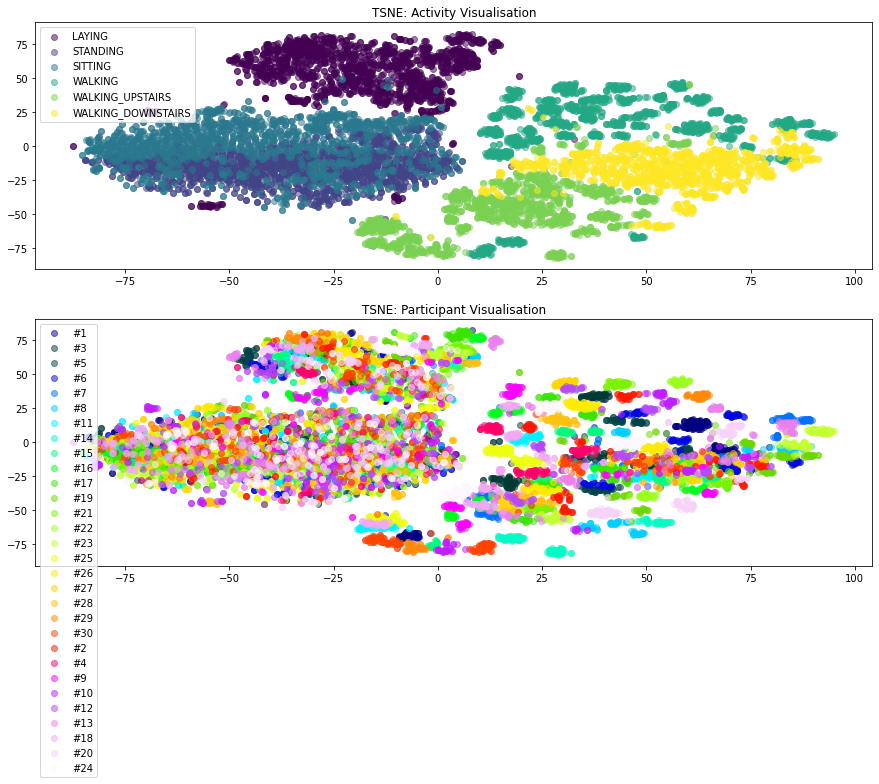

In [9]:
tsne_data = df.copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)


# Create subplots
fig, axarr = plt.subplots(2, 1, figsize=(15,10))

### Plot Activities
# Get colors
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    axarr[0].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
axarr[0].set_title('TSNE: Activity Visualisation')
axarr[0].legend()


### Plot Subjects
# Get colors
n = subject_data.unique().shape[0]
colormap = get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each participant
for i, group in enumerate(subject_data.unique()):
    # Mask to separate sets
    mask = (subject_data==group).values
    axarr[1].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

axarr[1].set_title('TSNE: Participant Visualisation')
axarr[1].legend()
plt.show()



In plot 1 you can clearly see the activities are mostly separable.

Plot 2 reveals personal information of the participants. Everybody has for example an unique walking style (on the upper right). Therefore the smartphone should be able to detect what you are doing and also who is using the smartphone

In [12]:
enc=LabelEncoder()
label_encoded=enc.fit_transform(label)
X_train,X_test,y_train,y_test=train_test_split(tsne_data,label_encoded,random_state=3)

lgbm=LGBMClassifier(n_estimators=500, random_state=3)
lgbm=lgbm.fit(X_train,y_train)

score=accuracy_score(y_true=y_test, y_pred=lgbm.predict(X_test))
print('Accuracy on testset:\t{:.4f}\n'.format(score))


Accuracy on testset:	0.9569



In [18]:
data=[]

for activity in label_counts.index:
    act_data=df[label==activity].copy()
    act_data_data=act_data.pop('Data')
    act_subject_data=act_data.pop('subject')
    
    scl=StandardScaler()
    act_data=scl.fit_transform(act_data)
    
    pca=PCA(n_components=0.9,random_state=3)
    act_data=pca.fit_transform(act_data)
    
    enc=LabelEncoder()
    label_encoded=enc.fit_transform(act_subject_data)
    X_train,X_test,y_train,y_test=train_test_split(act_data,label_encoded,random_state=3)
    
    print('Activity: {}'.format(activity))
    lgbm=LGBMClassifier(n_estimators=500,random_state=3)
    lgbm=lgbm.fit(X_train,y_train)
    
    score=accuracy_score(y_true=y_test,y_pred=lgbm.predict(X_test))
    print('Accuracy on test:\t{:.4f}\n'.format(score))
    data.append([activity,score])

Activity: LAYING
Accuracy on test:	0.6461

Activity: STANDING
Accuracy on test:	0.5367

Activity: SITTING
Accuracy on test:	0.5303

Activity: WALKING
Accuracy on test:	0.9606

Activity: WALKING_UPSTAIRS
Accuracy on test:	0.9249

Activity: WALKING_DOWNSTAIRS
Accuracy on test:	0.9148



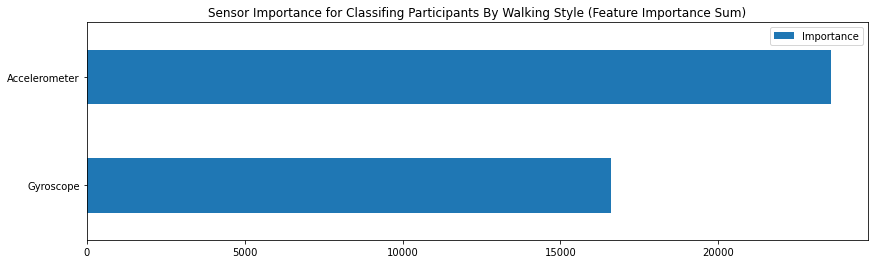

In [22]:
tsne_data=df[label=="WALKING"].copy()
data_data=tsne_data.pop('Data')
subject_data=tsne_data.pop('subject')

scl=StandardScaler()
tsne_data=scl.fit_transform(tsne_data)

enc=LabelEncoder()
label_encoded=enc.fit_transform(subject_data)
X_train,X_test,y_train,y_test=train_test_split(tsne_data,label_encoded,random_state=3)

lgbm==LGBMClassifier(n_estimators=500,random_state=3)
lgbm=lgbm.fit(X_train,y_train)

features=df.drop(['Data','subject'],axis=1).columns
importances=lgbm.feature_importances_

data={'Gyroscope':0,'Accelerometer':0}
for importance,feature in zip(importances,features):
    if 'Gyro' in feature:
        data['Gyroscope'] += importance
    if 'Acc' in feature:
        data['Accelerometer']+=importance
        
sensor_df=pd.DataFrame.from_dict(data,orient='index').rename(columns={0:'Importance'})
sensor_df.plot(kind='barh',figsize=(14,4),title='Sensor Importance for Classifing Participants By Walking Style (Feature Importance Sum)')
plt.show()

The accelerometer supplies slightly more information. Both sensors are important for classification and refraining from using both sensors will be a drawback for the quality of the model.

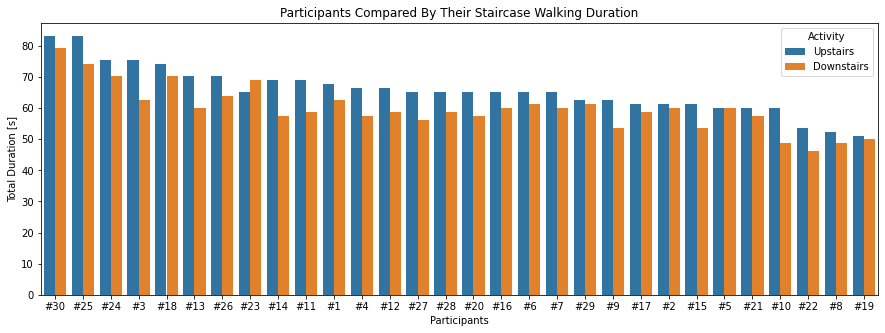

In [23]:
mask=label.isin(['WALKING_UPSTAIRS','WALKING_DOWNSTAIRS'])
duration_df=(df[mask].groupby([label[mask],'subject'])['Data'].count()*1.28)
plot_data=duration_df.reset_index().sort_values('Data',ascending=False)
plot_data['Activity']=plot_data['Activity'].map({'WALKING_UPSTAIRS':'Upstairs','WALKING_DOWNSTAIRS':'Downstairs'})
plt.figure(figsize=(15,5))
sns.barplot(data=plot_data,x='subject',y='Data',hue='Activity')
plt.title('Participants Compared By Their Staircase Walking Duration')
plt.xlabel('Participants')
plt.ylabel('Total Duration [s]')
plt.show()

it is very simple to understand that there is always more time taken to move upsatirs rather to move downsatirs.
Furthermore the range of the duration is narrow and adjusted to the conditions. A young person being ~50% fast in walking upstairs than an older one is reasonable.

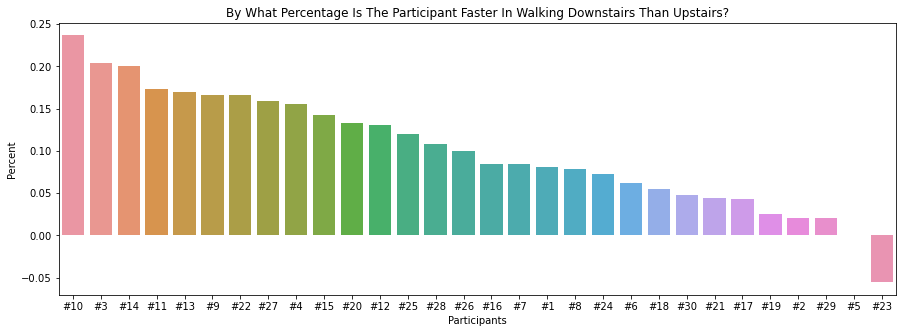

In [25]:
plt.figure(figsize=(15,5))
plot_data=((duration_df.loc['WALKING_UPSTAIRS']/duration_df.loc['WALKING_DOWNSTAIRS']) -1).sort_values(ascending=False)
sns.barplot(x=plot_data.index,y=plot_data)
plt.title('By What Percentage Is The Participant Faster In Walking Downstairs Than Upstairs?')
plt.xlabel('Participants')
plt.ylabel('Percent')
plt.show()

There is a wide range in between the participants for their ratio of up-/down-walking. Since this represents their physical condition we can imagine a correlation to their age and health 

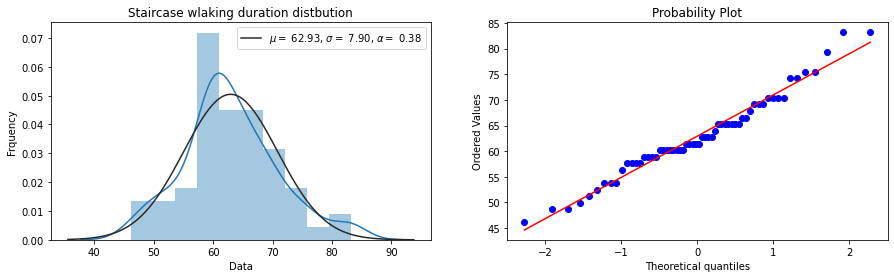

In [34]:
def plotSkew(x):
    (mu,sigma)=norm.fit(x)
    alpha=skew(x)

    fig, axarr = plt.subplots(1, 2, figsize=(15,4))

    sns.distplot(x,fit=norm,ax=axarr[0])
    axarr[0].legend(['$\mu=$ {:.2f}, $\sigma=$ {:.2f}, $\\alpha=$ {:.2f}'.format(mu, sigma, alpha)], loc='best')
    axarr[0].set_title('Staircase wlaking duration distbution')
    axarr[0].set_ylabel('Frquency')

    res=probplot(x,plot=axarr[1])
    plt.show()

plotSkew(duration_df)

As aspected from most real world data the duration walking on the staircase is normally distributed

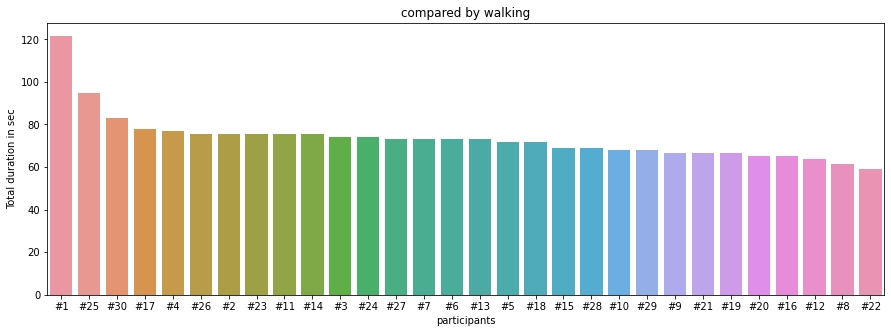

In [36]:
mask=label=='WALKING'
duration_df=(df[mask].groupby('subject')['Data'].count()*1.28)

plot_data=duration_df.reset_index().sort_values('Data',ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(data=plot_data,x='subject',y='Data')
plt.title('compared by walking')
plt.xlabel('participants')
plt.ylabel('Total duration in sec')
plt.show()

Since the duration of each participant walking is distributed over a range I assume the participants had a fixed walking distance for their experiment rather than a fixed duration. 

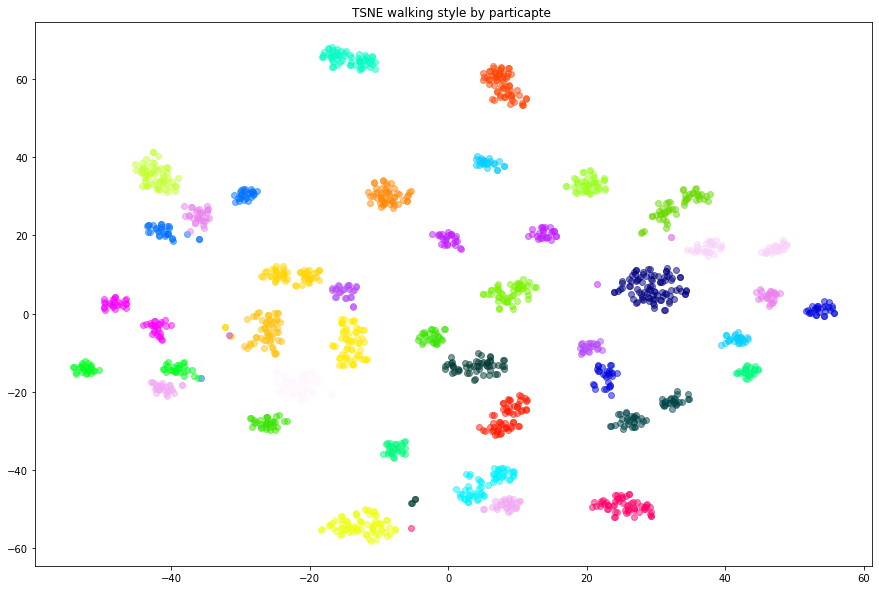

In [47]:
tsne_data=df[label=='WALKING'].copy()
data_data=tsne_data.pop('Data')
subject_data=tsne_data.pop('subject')

scl=StandardScaler()
tsne_data=scl.fit_transform(tsne_data)

pca=PCA(n_components=0.9,random_state=3)
tsne_data=pca.fit_transform(tsne_data)

tsne=TSNE(random_state=3)
tsne_transformed=tsne.fit_transform(tsne_data)

fig,axarr=plt.subplots(1,1,figsize=(15,10))

n=subject_data.unique().shape[0]
colormap=get_cmap('gist_ncar')
colors=[rgb2hex(colormap(col))for col in np.arange(0,1.01,1/(n-1))]

for i, group in enumerate(subject_data.unique()):
    mask = (subject_data==group).values
    axarr.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
    
axarr.set_title('TSNE walking style by particapte ')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

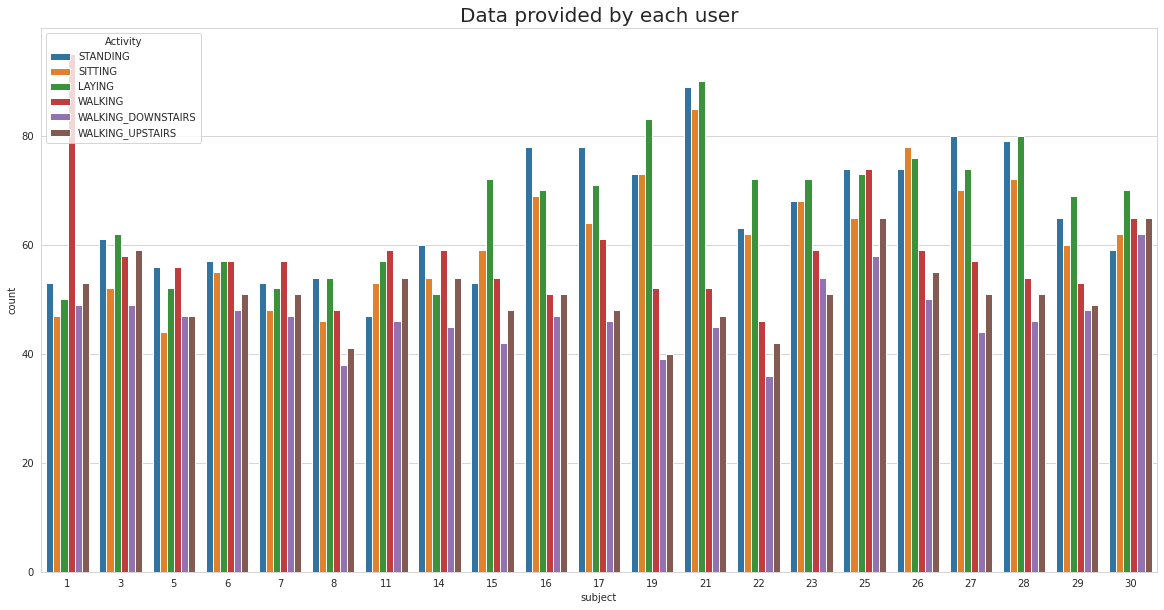

In [52]:
sns.set_style('whitegrid')
plt.rcParams['font.family']='Dejavu Sans'
plt.figure(figsize=(20,10))
plt.title('Data provided by each user',fontsize=20)
sns.countplot(x='subject',hue='Activity',data=df1)
plt.show

As we can see We have got almost same number of reading from all the subjects means there are not sygnificant difference in reading then we should not worry about it

In [69]:
columns = df1.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

df1.columns = columns
df2.columns = columns

df2.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'Data'],
      dtype='object', length=564)

Text(0.2, 9, 'Moving Activities')

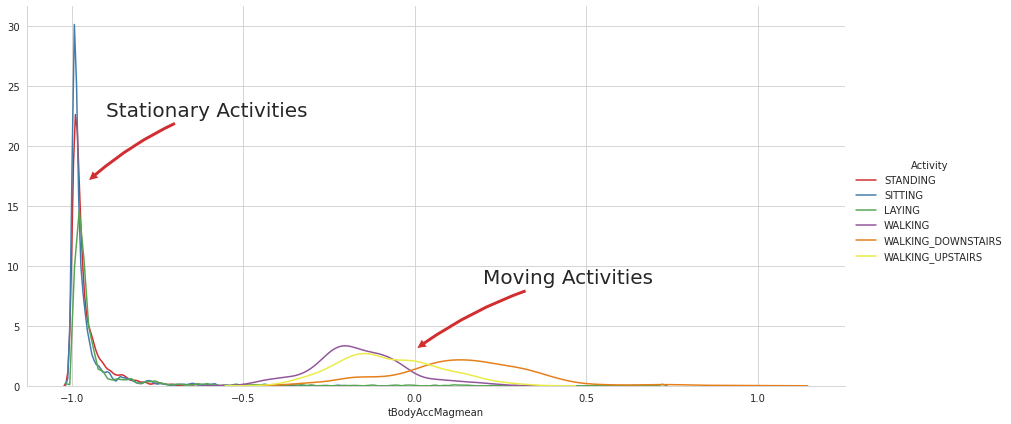

In [70]:
sns.set_palette("Set1",desat=0.80)
facetgrid = sns.FacetGrid(df1, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities",xy=(-0.956,17),xytext=(-0.9,23),size=20,va='center',ha='left',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities",xy=(0,3),xytext=(0.2,9),size=20,va='center',ha='left',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

 we can clearly see above the difference between stationary activities and Moving Activities

# conclusion

Within a short time (1-1.5 min) the smartphone has enough data to determine what its user is doing or who the user is and even the basics of a persons specific walking style (Slow steps per second). By linking this insights to more personal data of the participants extensiv options open up.

I explored the activity recognition dataset. I visualized the data using matplotlib. Then, I applied numerous machine learning algorithms and Logistic Regression performed the best what i cpould do
